# Hierarchical Clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [2]:
air = pd.read_excel("D:/Data Science/Assignments/clustering/EastWestAirlines.xlsx",sheet_name='data')

In [3]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
air.shape

(3999, 12)

In [6]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airline = air.drop(['ID#'],axis=1)

In [8]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
airline.shape

(3999, 11)

In [10]:
airline.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


Normalizing the data using Standard Scaler (Used in k-Means)

In [11]:
scaler = StandardScaler()
scaler.fit(airline)
scaled_data = scaler.transform(airline)

In [12]:
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [13]:
scaled_data.shape

(3999, 11)

Normalization using Simple Feature Scaling

In [14]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
# Normalized data frame (considering the numerical part of data)
norm = norm_func(scaled_data)
norm

array([[0.0651474 , 0.07633321, 0.05169794, ..., 0.06890524, 0.14313976,
        0.05181025],
       [0.0614173 , 0.07633321, 0.05169794, ..., 0.06890524, 0.14248522,
        0.05181025],
       [0.07068491, 0.07633321, 0.05169794, ..., 0.06890524, 0.14383521,
        0.05181025],
       ...,
       [0.08419986, 0.07633321, 0.11305382, ..., 0.06890524, 0.02863613,
        0.13927366],
       [0.07636242, 0.07633321, 0.05169794, ..., 0.08004131, 0.02861568,
        0.05181025],
       [0.05461519, 0.07633321, 0.05169794, ..., 0.06890524, 0.02855432,
        0.05181025]])

In [16]:
# create dendrogram (uncomment to run) running takes time
# plt.figure(figsize=(15, 10))
# dendrogram = sch.dendrogram(sch.linkage(norm, method='single')) 

In [17]:
# (uncomment to run) running takes time
# plt.figure(figsize=(15, 10))
# dendrogramavg = sch.dendrogram(sch.linkage(norm, method='average'))

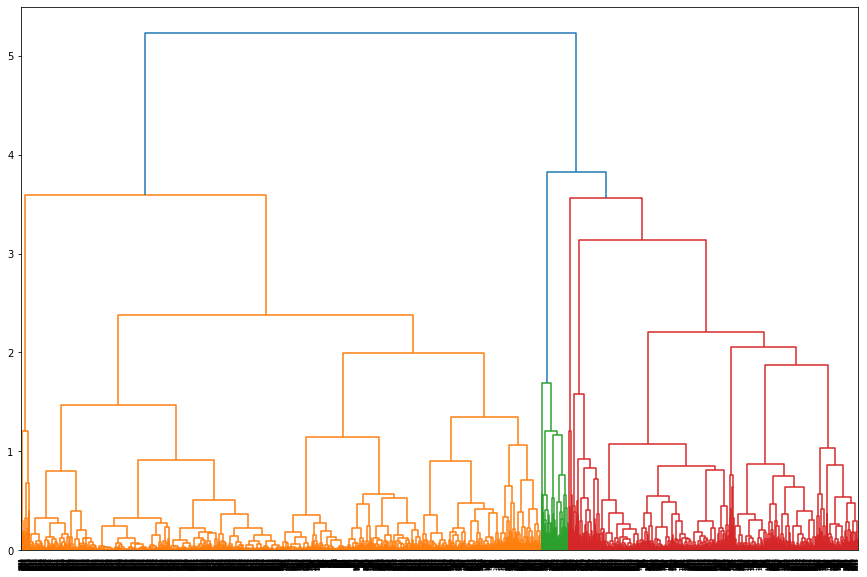

In [18]:
plt.figure(figsize=(15, 10))
dendrogramward = sch.dendrogram(sch.linkage(norm, method='ward'))

In [19]:
# # (uncomment to run) running takes time
# plt.figure(figsize=(15, 10))
# dendrogrammedian = sch.dendrogram(sch.linkage(norm, method='median'))

In [20]:
# # (uncomment to run) running takes time
# plt.figure(figsize=(15, 10))
# dendrogramweighted = sch.dendrogram(sch.linkage(norm, method='weighted'))

In [21]:
# # (uncomment to run) running takes time
# plt.figure(figsize=(15, 10))
# dendrogramcomplete = sch.dendrogram(sch.linkage(norm, method='complete'))

In [22]:
# create clusters
hic = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [23]:
# save clusters for chart
y_hic = hic.fit_predict(norm)
Clusters=pd.DataFrame(y_hic,columns=['HEIClusters'])

In [24]:
Clusters

,HEIClusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,1
3995,1
3996,0
3997,1


In [25]:
heiclus=pd.concat([airline,Clusters],axis=1)
heiclus

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HEIClusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


# K-Means Clustering

In [26]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

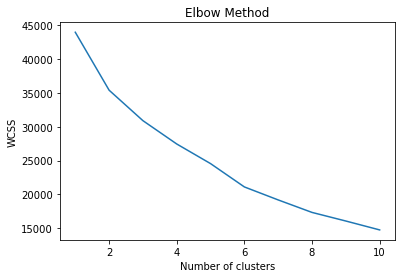

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [29]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [30]:
#Assign clusters to the data set
airline['k-mcluster'] = clusters_new.labels_

In [31]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-2.98478754e-01, -6.42142013e-02, -6.13747535e-01,
         3.28947498e-02, -6.07426678e-02, -5.17995326e-01,
        -4.91207604e-01, -1.86400083e-01, -1.98822948e-01,
        -2.07899699e-01, -3.48824498e-01],
       [ 1.19130578e+00,  1.02056447e+00,  9.95222056e-02,
         1.36680959e-01, -6.27665798e-02,  6.19234895e-01,
         1.55056071e+00,  3.42272158e+00,  3.67662420e+00,
         2.79402662e-01,  9.08902922e-01],
       [ 4.21685967e-01, -9.97266943e-03,  1.18816125e+00,
        -8.23662416e-02, -5.47626400e-02,  9.03299347e-01,
         7.41625184e-01, -9.44153225e-02, -1.04476981e-01,
         3.70515148e-01,  5.62946631e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [32]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k-mcluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2


# DBSCAN

In [33]:
#Import the libraries
from sklearn.cluster import DBSCAN

In [34]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(scaled_data)

DBSCAN(eps=0.8, min_samples=6)

In [35]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
DB = pd.DataFrame(dbscan.labels_,columns=['DBcluster'])

In [37]:
DB.value_counts()

DBcluster
 0           2216
 1            944
-1            820
 2             12
 3              7
dtype: int64

In [38]:
dbclusters=pd.concat([airline,DB,Clusters],axis=1)

In [39]:
dbclusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k-mcluster,DBcluster,HEIClusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,1
